<a href="https://colab.research.google.com/github/vinodhmano/machinelearning/blob/master/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [8]:
import math
number_of_rounds = 10000
number_of_ads = 10
number_of_time_selected = [0] * number_of_ads
sum_of_rewards = [0] * number_of_ads
total_rewards = 0
selected_ads = []

for n in range(0, number_of_rounds):
  ad = 0
  max_upper_bound = 0
  for i in range(0, number_of_ads):
    if (number_of_time_selected[i] > 0):
      average_reward = sum_of_rewards[i] / number_of_time_selected[i]
      confidence_delta = math.sqrt(3/2 * math.log(n+1) / number_of_time_selected[i])
      upper_bound = average_reward + confidence_delta
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  selected_ads.append(ad)
  reward = dataset.iloc[n, ad]
  number_of_time_selected[ad] += 1
  sum_of_rewards[ad] += reward
  total_rewards += reward

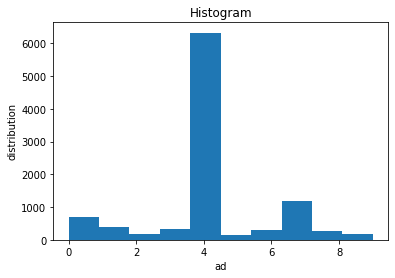

In [10]:
plt.hist(selected_ads)
plt.title('Histogram')
plt.xlabel('ad')
plt.ylabel('distribution')
plt.show()